# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

Closest point (red): (np.float64(0.0481115536116194), np.float64(8.0530509124927), np.float64(43.29877255955909))
Closest point (blue): (np.float64(2.03390100209471), np.float64(5.28929590079911), np.float64(36.15344028339771))
avgsum*1000 =  26484.070947652268


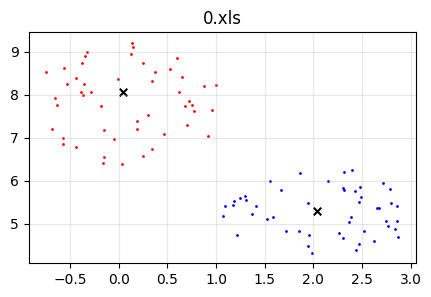

Closest point (red): (np.float64(6.46998257368897), np.float64(2.16976099669024), np.float64(3086.316800188415))
Closest point (blue): (np.float64(8.04007453084081), np.float64(-1.10870556888781), np.float64(3181.696356750936))
Closest point (green): (np.float64(10.0225353109378), np.float64(1.15420059917185), np.float64(2454.669296416424))
avgsum*1000 =  2907560.817785258


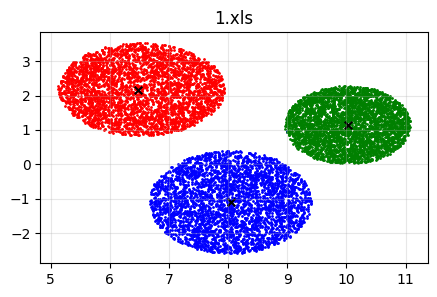

Closest point (red): (np.float64(11.33408020339), np.float64(5.96596108062826), np.float64(2811.468599661842))
Closest point (blue): (np.float64(34.9263513155908), np.float64(-4.6952764918914), np.float64(3092.4875279608495))
avgsum*1000 =  1967985.3758742304


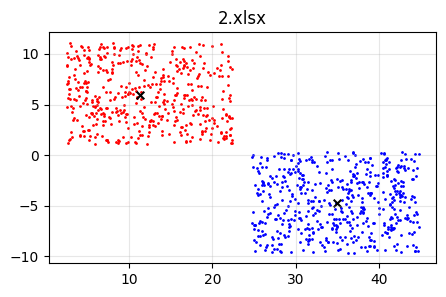

Closest point (red): (np.float64(-25.1307584045602), np.float64(-14.4133283639855), np.float64(25620.922374554215))
Closest point (blue): (np.float64(30.8495291640572), np.float64(-4.51720290933603), np.float64(24365.73551645194))
Closest point (green): (np.float64(3.51791128381387), np.float64(4.65369555801186), np.float64(24396.131988100948))
avgsum*1000 =  19646678.82766133


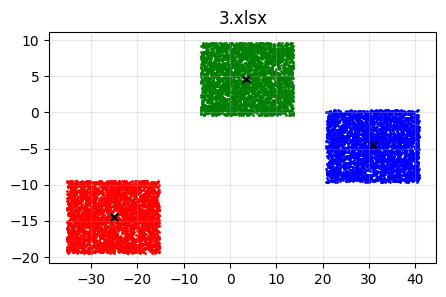

Closest point (red): (np.float64(0.67779061055821), np.float64(7.4683214519915), np.float64(460.4682788070491))
Closest point (blue): (np.float64(4.4992892332316), np.float64(2.5248135549032), np.float64(470.32855350048715))
avgsum*1000 =  245527.7029547788


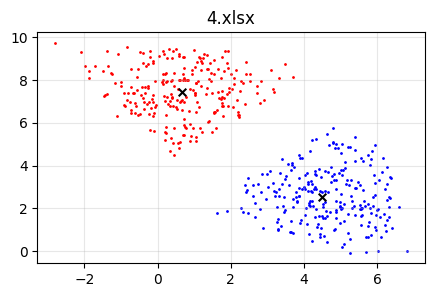

Closest point (red): (np.float64(-2.7496738270139), np.float64(1.1430593180752), np.float64(4503.347988185507))
Closest point (blue): (np.float64(-0.92395441683756), np.float64(7.1198601472395), np.float64(4975.829741832897))
Closest point (green): (np.float64(3.8585848100911), np.float64(2.9071669740048), np.float64(4958.924247086197))
avgsum*1000 =  4812700.659034868


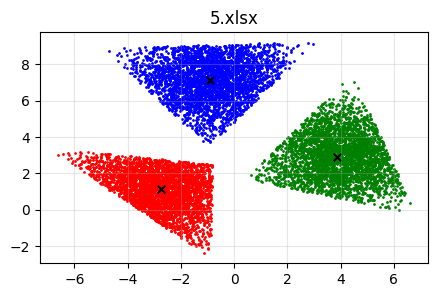

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

names = ["0.xls", "1.xls", "2.xlsx", "3.xlsx", "4.xlsx", "5.xlsx"]

def dist(x1, y1, x2, y2):
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def find_closest(X, Y, t=0):
    X = np.asarray(X)
    Y = np.asarray(Y)
    dx = X[:, None] - X[None, :]
    dy = Y[:, None] - Y[None, :]
    dist = np.array([])
    if t == 0:
        dist = np.sqrt(dx**2 + dy**2)
    else:
        dist = np.abs(dx) + np.abs(dy)
    sums = dist.sum(axis=1)
    i = np.argmin(sums)
    return X[i], Y[i], sums[i]

for name in names:
    df = pd.read_excel(name)
    P = df.iloc[:, :2].values
    plt.figure(figsize=(5,3))
    arr = []
    X0, Y0 = [], []
    X1, Y1 = [], []
    X2, Y2 = [], []
    if name == "0.xls":
        for X,Y in P:
            if X < 1.05:
                X0.append(X)
                Y0.append(Y)
            else:
                X1.append(X)
                Y1.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
    elif name == "1.xls":
        for X,Y in P:
            if X < 8 and Y > 0.5:
                X0.append(X)
                Y0.append(Y)
            elif (X < 9 and Y < 1) or (X < 9.5 and Y < 0):
                X1.append(X)
                Y1.append(Y)
            else:
                X2.append(X)
                Y2.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
        plt.scatter(X2, Y2, color='green', s=1)
    elif name == "2.xlsx":
        for X,Y in P:
            if X < 24:
                X0.append(X)
                Y0.append(Y)
            else:
                X1.append(X)
                Y1.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
    elif name == "3.xlsx":
        for X,Y in P:
            if X < 0 and Y < -5:
                X0.append(X)
                Y0.append(Y)
            elif X < 20:
                X2.append(X)
                Y2.append(Y)
            else:
                X1.append(X)
                Y1.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
        plt.scatter(X2, Y2, color='green', s=1)
    elif name == "4.xlsx":
        k = 1
        b = 2
        for X,Y in P:
            if k * X + b < Y:
                X0.append(X)
                Y0.append(Y)
            else:
                X1.append(X)
                Y1.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
    elif name == "5.xlsx":
        k1 = -1
        b1 = 2
        k2 = 1
        b2 = 4
        for X,Y in P:
            if k1 * X + b1 > Y:
                X0.append(X)
                Y0.append(Y)
            elif k2 * X + b2 < Y:
                X1.append(X)
                Y1.append(Y)
            else:
                X2.append(X)
                Y2.append(Y)
        plt.scatter(X0, Y0, color='red', s=1)
        plt.scatter(X1, Y1, color='blue', s=1)
        plt.scatter(X2, Y2, color='green', s=1)
    else:
        plt.scatter(P[:,0], P[:,1], color='red', s=1)
    plt.grid(True, alpha=0.3)
    plt.title(name)
    sum_cl = 0
    p0 = find_closest(X0, Y0)
    sum_cl += p0[2]
    p1 = find_closest(X1, Y1)
    sum_cl += p1[2]
    print("Closest point (red):", find_closest(X0, Y0, t=1 if name == "3.xlsx" or name == "4.xlsx" else 0))
    plt.scatter(p0[0], p0[1], color='black', s=30, marker='x')
    print("Closest point (blue):", find_closest(X1, Y1, t=1 if name == "3.xlsx" or name == "4.xlsx" else 0))
    plt.scatter(p1[0], p1[1], color='black', s=30, marker='x')
    if (len(X2) > 0):
        p2 = find_closest(X2, Y2)
        sum_cl += p2[2]
        print("Closest point (green):", find_closest(X2, Y2, t=1 if name == "3.xlsx" or name == "4.xlsx" else 0))
        plt.scatter(p2[0], p2[1], color='black', s=30, marker='x')
    print("avgsum*1000 = ", sum_cl / 3 * 1000)
    plt.show()

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [ ]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [ ]:
two_means =  
dbscan = 

clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )

In [ ]:
np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()